# **Power Transformer**
Power transforms are a family of parametric, monotonic transformations that are applied to make data more Gaussian-like. This is useful for modeling issues related to heteroscedasticity (non-constant variance), or other situations where normality is desired. Currently, PowerTransformer supports the Box-Cox transform and the Yeo-Johnson transform. The optimal parameter for stabilizing variance and minimizing skewness is estimated through maximum likelihood. Box-Cox requires input data to be strictly positive, while Yeo-Johnson supports both positive or negative data. By default, zero-mean, unit-variance normalization is applied to the transformed data.

## **Import Required Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings
warnings.filterwarnings("ignore")

## **Read the Data**

In [2]:
df = pd.read_csv("D:\Coding\Datasets\concrete.csv")
df

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [3]:
# Check the null values
df.isnull().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

In [4]:
# Describe the data
df.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


## **Train Test Split**

In [5]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df.drop(["strength"], axis=1),
                                                    df["strength"],
                                                    test_size=0.3,
                                                    random_state=0)
x_train.shape, x_test.shape

((721, 8), (309, 8))

## **Train a Linear Regression Model**

In [6]:
from sklearn.linear_model import LinearRegression

In [7]:
# Instantiate a LinearRegression object
lr = LinearRegression()

# Fit the training data
lr.fit(x_train, y_train)

LinearRegression()

## **Accuracy Assessment**

In [8]:
# Predict the test data with the LR model
y_pred = lr.predict(x_test)

In [9]:
# Calculate the R2 score
from sklearn.metrics import r2_score

print("R2 Score of Linear Regression Model:", r2_score(y_test, y_pred))

R2 Score of Linear Regression Model: 0.6352987285077925


In [10]:
# Calculate accuracy after cross validation
from sklearn.model_selection import cross_val_score

# Instantiate a new Linear Regression model
lr = LinearRegression()

# Print the cross validation score
print("R2 Score of Linear Regression model after Cross Validation:", 
      np.mean(cross_val_score(estimator=lr, X=x_train, y=y_train, cv=10, scoring="r2")))

R2 Score of Linear Regression model after Cross Validation: 0.5909231186526501


## **Data Visualization**

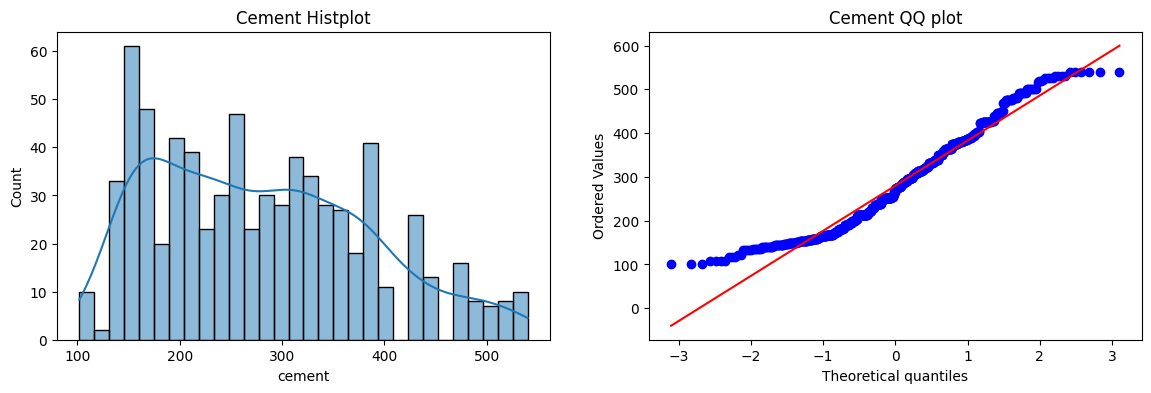

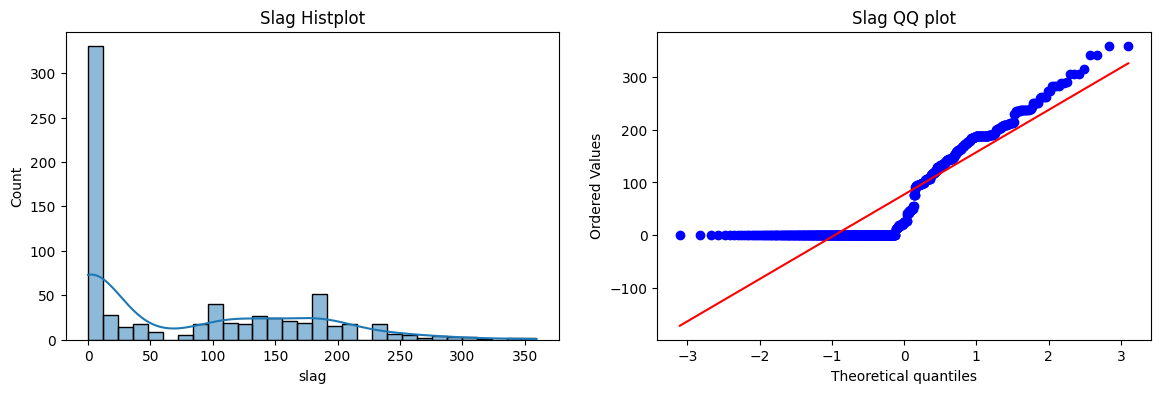

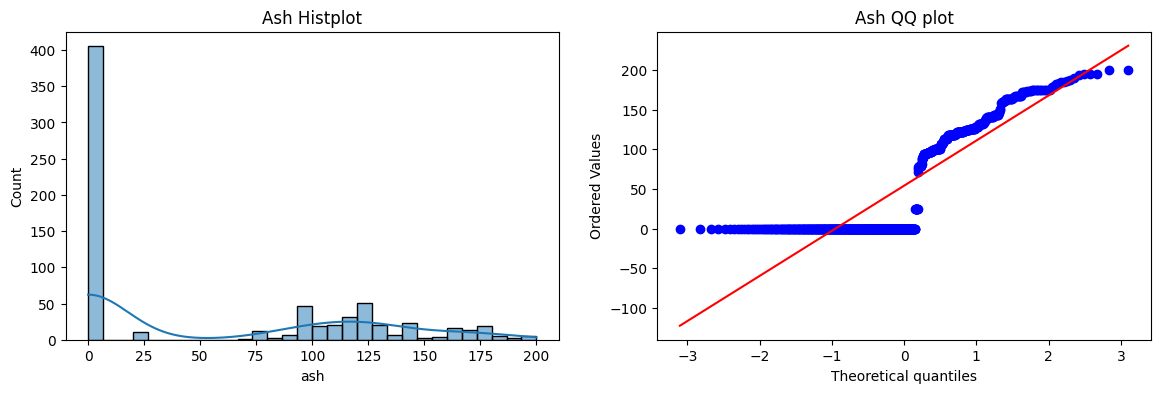

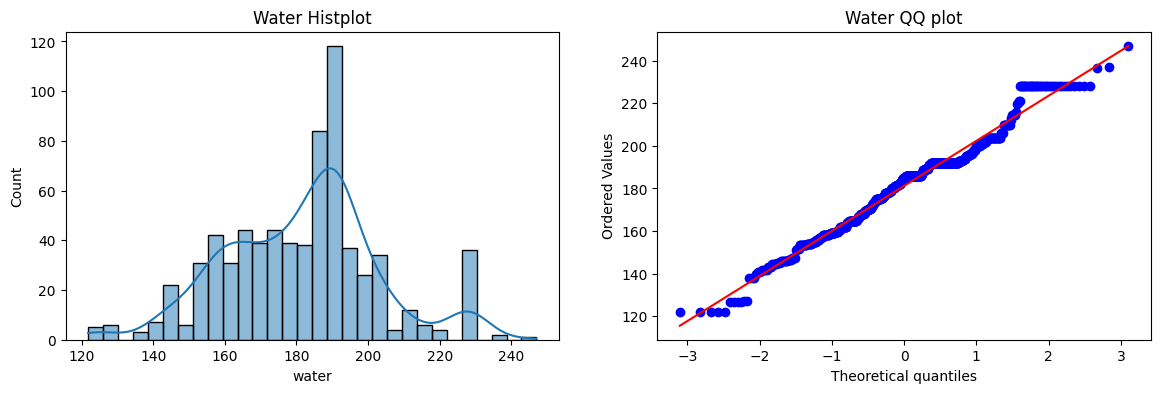

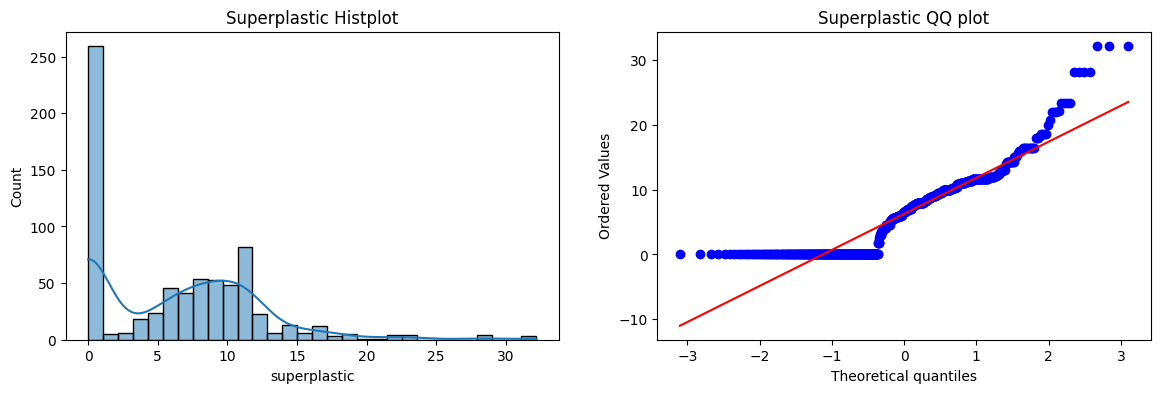

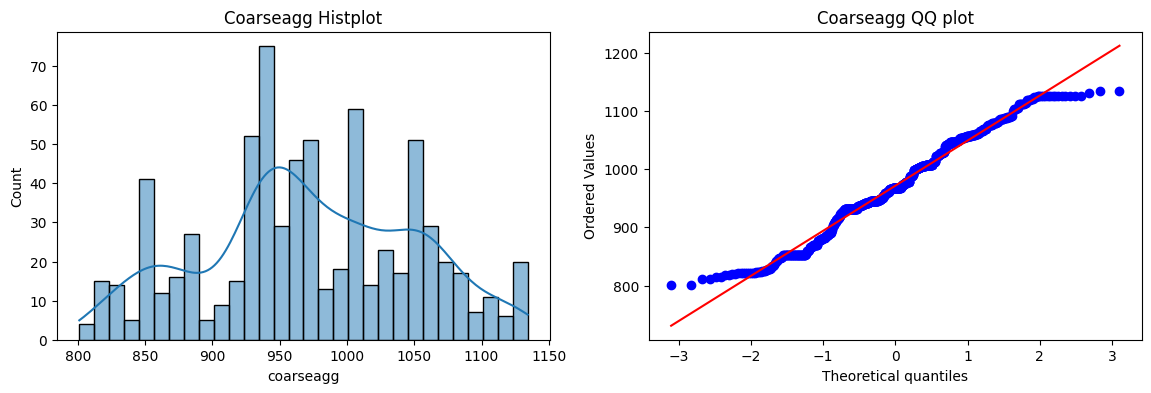

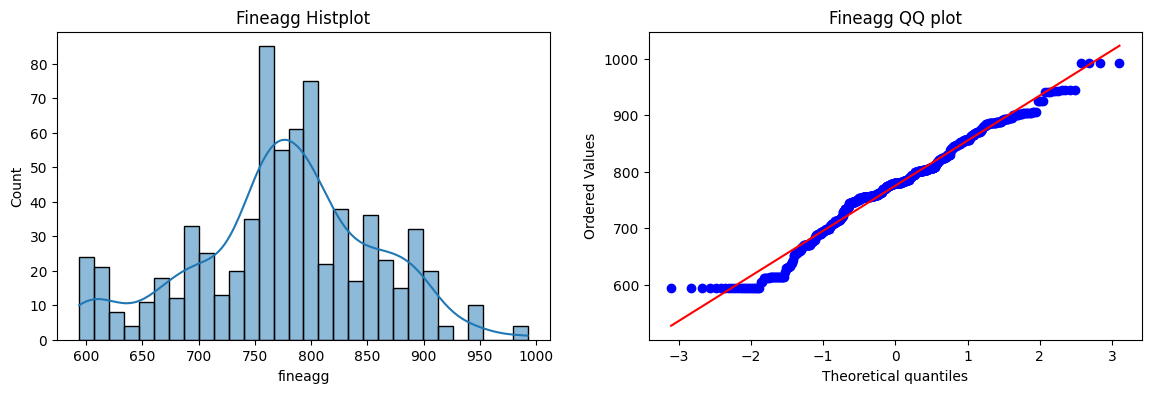

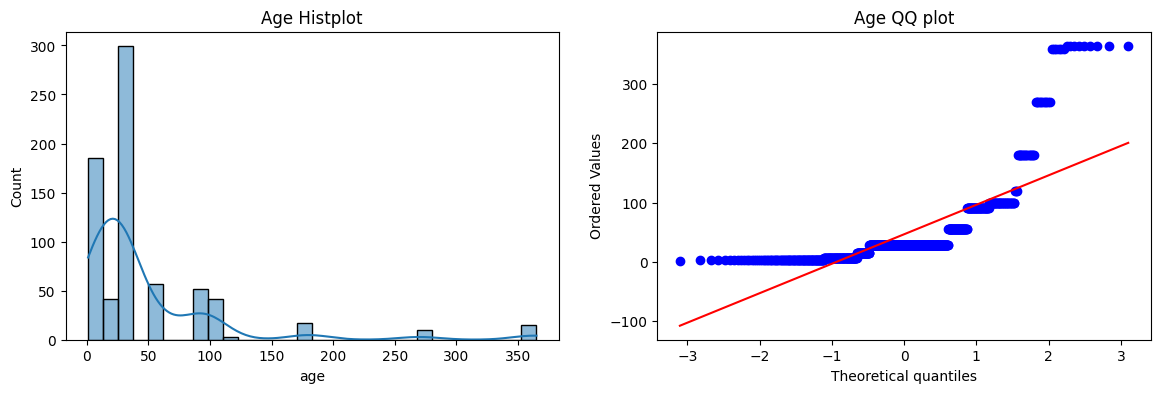

In [11]:
# Plot the histplot of each and every column without any transformation

for column in x_train.columns:
    plt.figure(figsize=(14, 4))
    
    plt.subplot(121)
    sns.histplot(x_train[column], kde=True, bins=30)
    plt.title(column.title() + " Histplot")
    
    plt.subplot(122)
    stats.probplot(x_train[column], dist="norm", plot=plt)
    plt.title(column.title() +" QQ plot")
    
    plt.show()

## **Apply Box-Cox Transformation**

The Box-Cox transformation is a mathematical technique used in statistics to stabilize variance and make data approximately follow a normal distribution. It is particularly useful when you are dealing with data that violates the assumptions of normality and constant variance, which are common assumptions in many statistical methods, including linear regression.

**Formula:**<br>
<center><img src="https://miro.medium.com/v2/resize:fit:884/1*_nHvGg-OQYtNSSZph-424g.png" style="height:200px"></center>

Here:
- **y** is the original data.
- **y^(lambda)** is the transformed data.
- **lambda** is the transformation parameter. It can be any real number, but in practice, it is often chosen to maximize the normality of the transformed data. This parameter determines the type of transformation applied to the data.

**Significance:**

1. **Stabilizes Variance**: When **lambda** is not equal to 1, the transformation can be used to stabilize the variance of the data. If the data has varying variances at different levels, the Box-Cox transformation can help make the variances more constant.

2. **Normalizes Distribution**: When **lambda** is chosen appropriately, the transformed data tends to follow a normal distribution more closely. This can be beneficial when using statistical techniques that assume normally distributed data.

3. **Handles Non-Negative Data**: The Box-Cox transformation is typically applied to non-negative data, as it involves taking logarithms and raising to powers. If your data contains negative values, you may need to add a constant to make it non-negative before applying the transformation.

<center><img src="https://media.geeksforgeeks.org/wp-content/uploads/20200531232546/output275.png" style="height:400px"></center>

### **Transform the Data using Box-Cox Transformer**

In [12]:
from sklearn.preprocessing import PowerTransformer

In [13]:
# Create an object of the PowerTransformer class
box_cox_transformer = PowerTransformer(method="box-cox", standardize=True)

# Fit and Tranform the training data
# Add a small value because Box-Cox transformation can only be applied to strictly positive data
x_train_transformed = box_cox_transformer.fit_transform(x_train + 0.00000001)

# Transform the testing data
x_test_transformed = box_cox_transformer.transform(x_test + 0.00000001)

In [14]:
# Convert the transformed array into pandas dataframe
x_train_transformed = pd.DataFrame(x_train_transformed, columns=x_train.columns)
x_test_transformed = pd.DataFrame(x_test_transformed, columns=x_test.columns)

In [15]:
x_train_transformed.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age
0,0.997702,-1.098501,-0.883227,0.230484,-1.331627,0.970226,-0.487995,-1.020126
1,0.426274,0.932195,-0.883227,-0.620783,0.770637,-0.736327,0.324399,0.112639
2,0.426274,-1.098501,-0.883227,0.511278,-1.331627,0.516899,0.664063,1.118538
3,1.617732,0.911461,-0.883227,0.000668,0.745761,-1.524260,0.037215,1.128292
4,1.019535,-1.098501,-0.883227,0.230484,-1.331627,-0.075447,-0.194190,-1.681085


### **Fetch the value of λ for Each Column**

In [16]:
# Convert the λ values into pandas series
lambda_values_box_cox = pd.Series(data=box_cox_transformer.lambdas_, index=x_train.columns)
lambda_values_box_cox

cement          0.183828
slag            0.023538
ash            -0.032326
water           0.925279
superplastic    0.084224
coarseagg       1.144747
fineagg         1.771619
age             0.041458
dtype: float64

### **Apply Linear Regression on Box-Cox Transformed Data**

In [17]:
# Instantiate a Linear Regression object
lr = LinearRegression()

# Fit the training data
lr.fit(x_train_transformed, y_train)

# Prdict the test data
y_pred = lr.predict(x_test_transformed)

# Calculate R2 Score
print("R2 Score of Linear Regression Model after Box-Cox Transformation:", r2_score(y_test, y_pred))

R2 Score of Linear Regression Model after Box-Cox Transformation: 0.8164826878675224


In [18]:
# Check accuracy after cross validation
print("R2 Score of Linear Regression Model after Box-Cox Transformation and Cross Validation:",
      np.mean(cross_val_score(lr, x_train_transformed, y_train, scoring="r2", cv=10)))

R2 Score of Linear Regression Model after Box-Cox Transformation and Cross Validation: 0.7872301063982323


### **Display the Box-Cox Transformed Data**

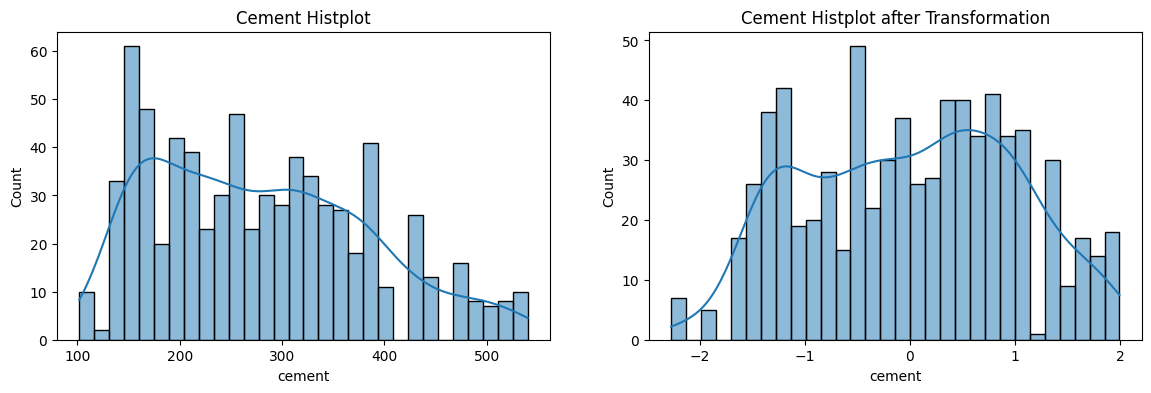

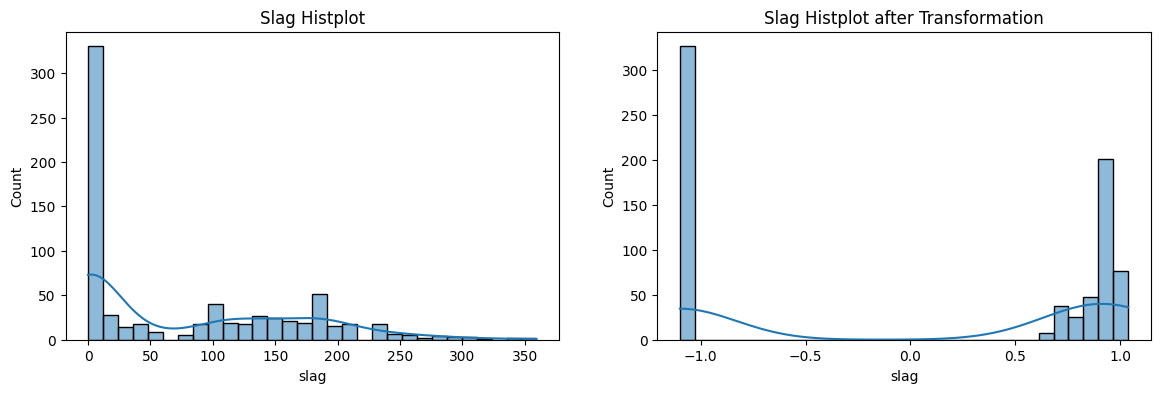

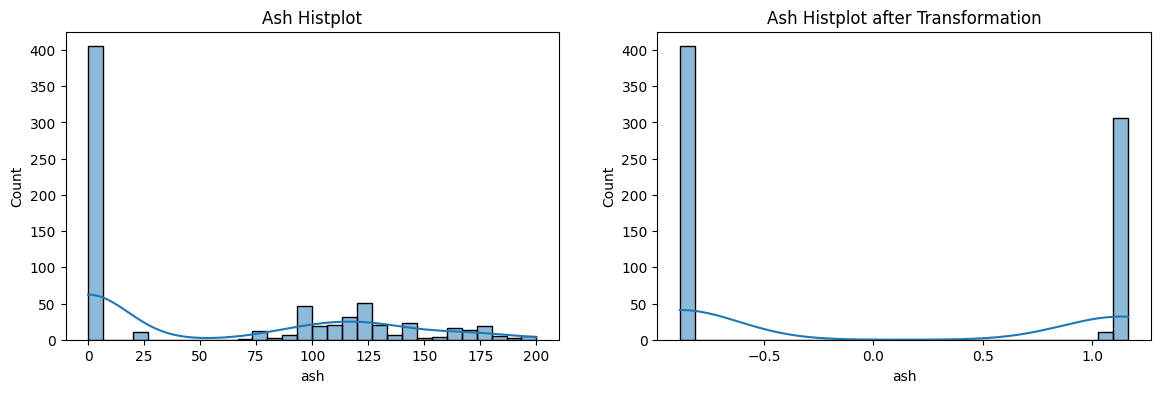

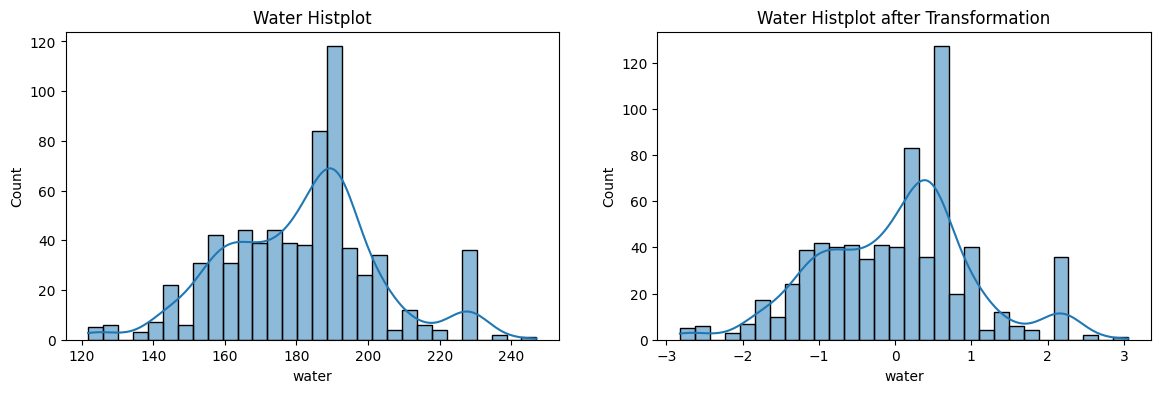

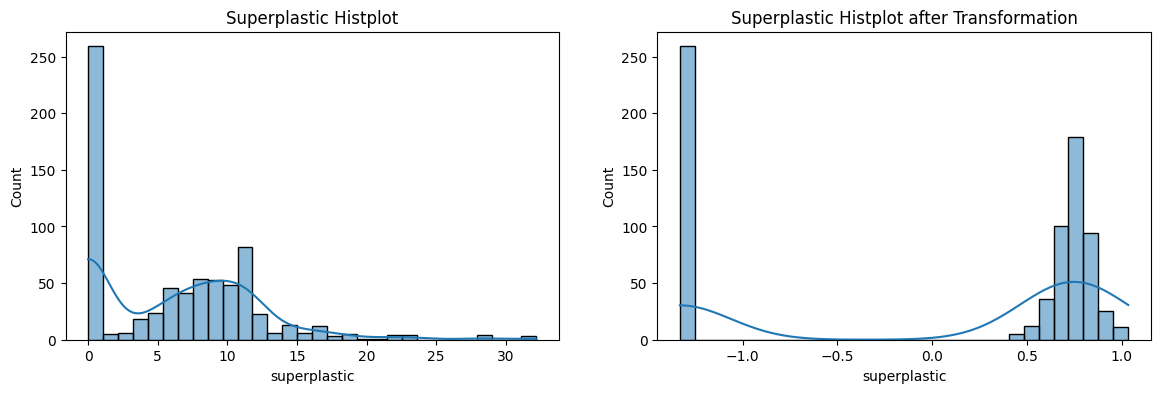

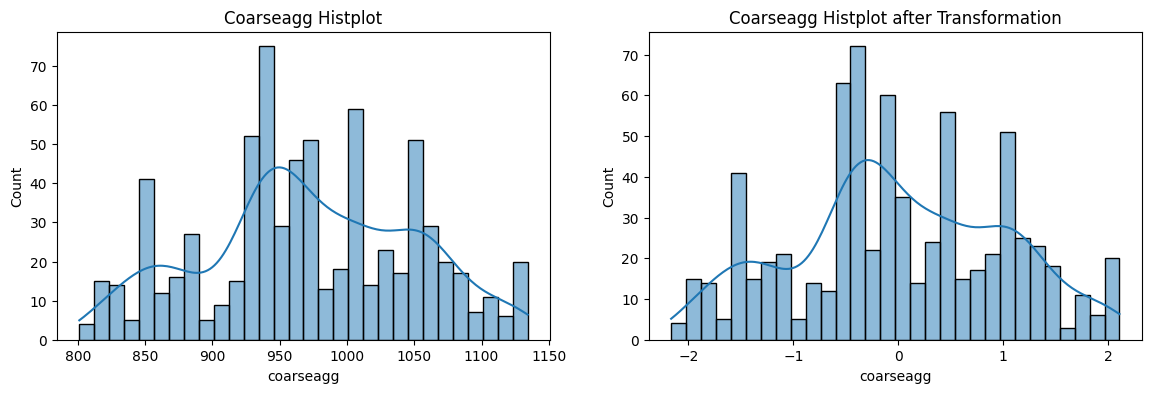

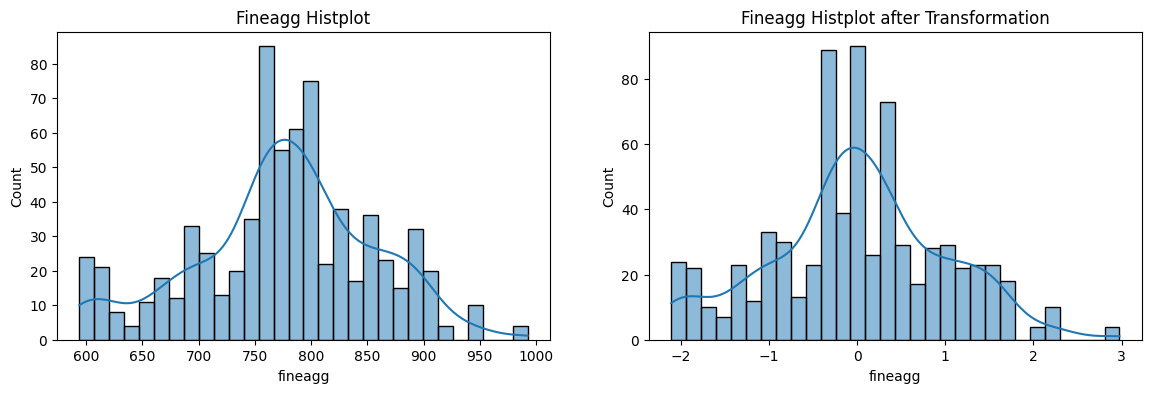

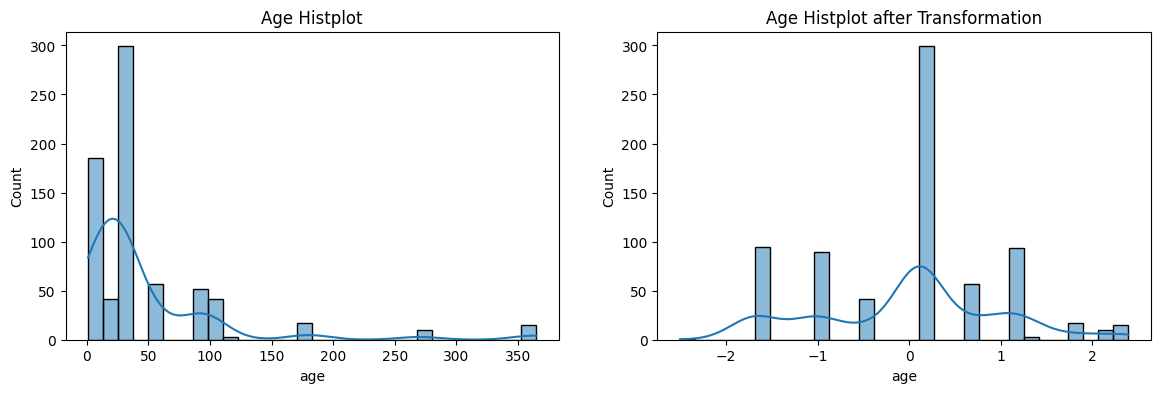

In [19]:
for column in x_train_transformed.columns:
    plt.figure(figsize=(14, 4))
    
    plt.subplot(121)
    sns.histplot(x_train[column], kde=True, bins=30)
    plt.title(column.title() + " Histplot")
    
    plt.subplot(122)
    sns.histplot(x_train_transformed[column], kde=True, bins=30)
    plt.title(column.title() + " Histplot after Transformation")
    
    plt.show()

## **Apply Yeo-Johnson Transformer**

The Yeo-Johnson transformation is a data transformation technique used in statistics and data analysis. It is primarily used for stabilizing variance and making data more closely follow a normal distribution. This transformation is an extension of the more commonly known Box-Cox transformation and was introduced by Yeo and Johnson in 2000 to address some of its limitations.

The Yeo-Johnson transformation works by applying a mathematical formula to each data point in a given dataset. Unlike the Box-Cox transformation, which is defined only for positive values, the Yeo-Johnson transformation can be applied to both positive and negative values and even zero values.

**Formula:**<br>
<center> <img src="https://graphworkflow.files.wordpress.com/2019/01/yeo_johnson.png" style="height:200px"></center>

Here:<br>
- **y** is the original data point.
- **y^(lambda)** is the transformed value.
- **lambda** is a parameter that determines the transformation. It can take any real value, including zero.

### **Transform the Data using Yeo-Johnson Transformer**

In [20]:
# Create an object of the PowerTransformer class
yeo_johnson_transformer = PowerTransformer(method="yeo-johnson", standardize=True)

# Fit and Tranform the training data
x_train_transformed = yeo_johnson_transformer.fit_transform(x_train)

# Transform the testing data
x_test_transformed = yeo_johnson_transformer.transform(x_test)

In [21]:
# Convert the transformed array into pandas dataframe
x_train_transformed = pd.DataFrame(x_train_transformed, columns=x_train.columns)
x_test_transformed = pd.DataFrame(x_test_transformed, columns=x_test.columns)

In [22]:
x_train_transformed.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age
0,0.997778,-1.067398,-0.881127,0.230492,-1.242897,0.970226,-0.487994,-1.042167
1,0.426242,0.977678,-0.881127,-0.620780,0.785715,-0.736329,0.324396,0.112282
2,0.426242,-1.067398,-0.881127,0.511284,-1.242897,0.516896,0.664059,1.130575
3,1.617860,0.897371,-0.881127,0.000675,0.664270,-1.524254,0.037212,1.140276
4,1.019614,-1.067398,-0.881127,0.230492,-1.242897,-0.075451,-0.194191,-1.666898


### **Fetch the value of λ for Each Column**

In [23]:
lambda_values_yeo_johnson = pd.Series(data=yeo_johnson_transformer.lambdas_, index=x_train.columns)
lambda_values_yeo_johnson

cement          0.181196
slag            0.028011
ash            -0.165526
water           0.924736
superplastic    0.286946
coarseagg       1.145007
fineagg         1.772672
age            -0.005485
dtype: float64

### **Apply Linear Regression on Box-Cox Transformed Data**

In [24]:
# Instantiate a Linear Regression object
lr = LinearRegression()

# Fit the yeo-johnson transformed training data
lr.fit(x_train_transformed, y_train)

# Predict the test data
y_pred = lr.predict(x_test_transformed)

# Calculate the R2 Score
print("R2 Score of Linear Regression Model after Yeo-Johnson Transformation:", r2_score(y_test, y_pred))

R2 Score of Linear Regression Model after Yeo-Johnson Transformation: 0.8250136885908435


In [25]:
# Check accuracy after cross validation
print("R2 Score of Linear Regression Model after Yeo-Johnson Transformation and Cross Validation:",
       np.mean(cross_val_score(lr, x_train_transformed, y_train, scoring="r2", cv=10)))

R2 Score of Linear Regression Model after Yeo-Johnson Transformation and Cross Validation: 0.7900530161619039


### **Display the Yeo-Johnson Transformed Data**

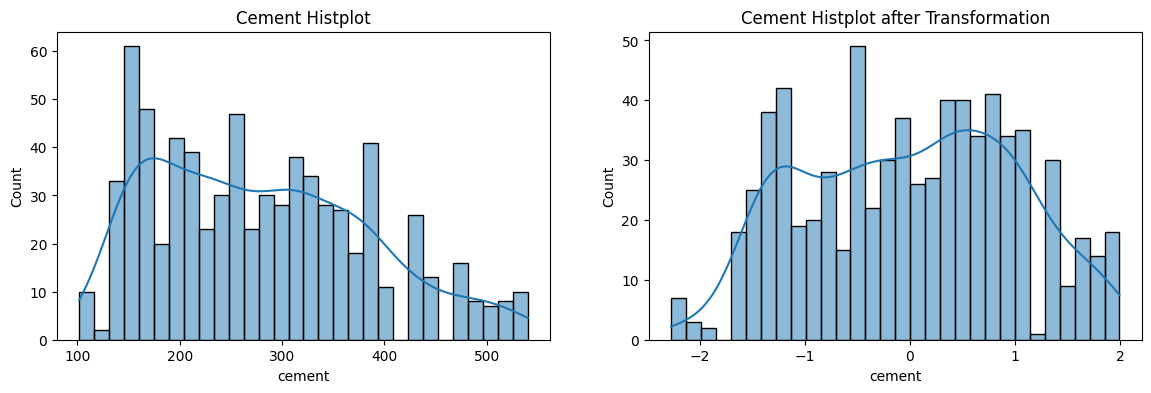

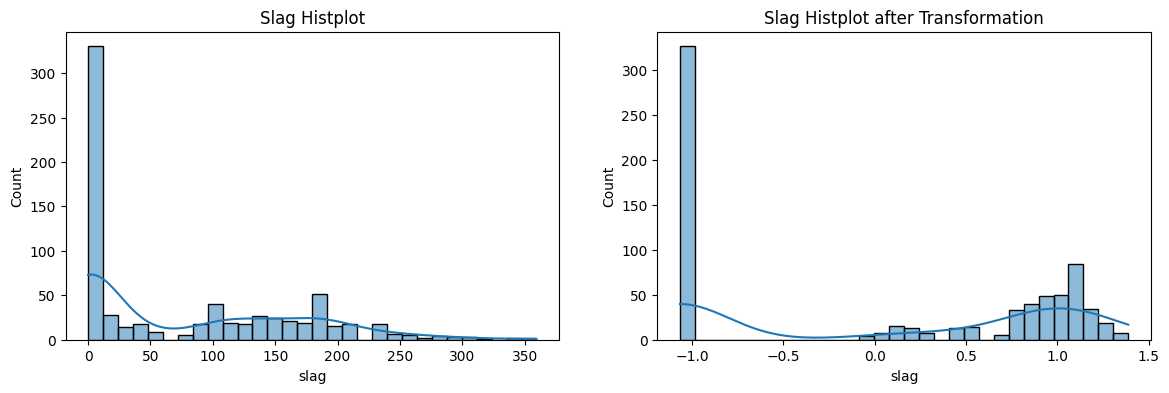

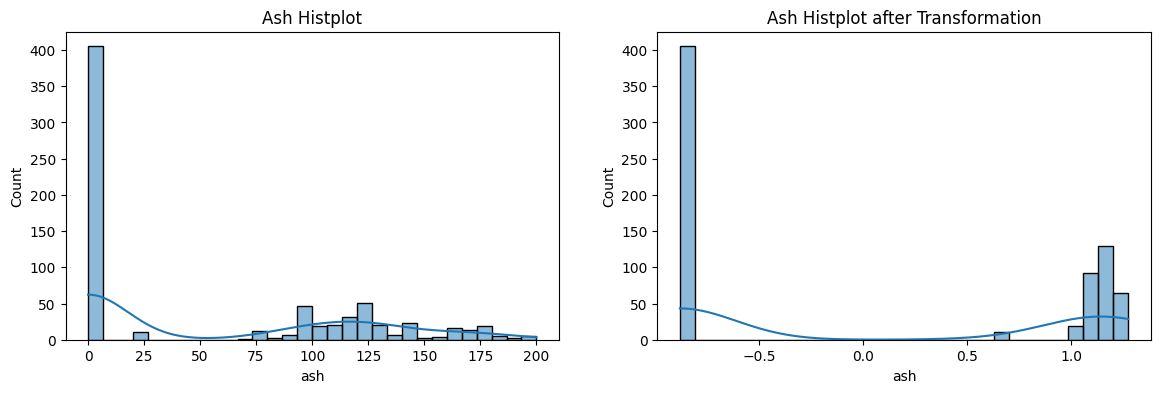

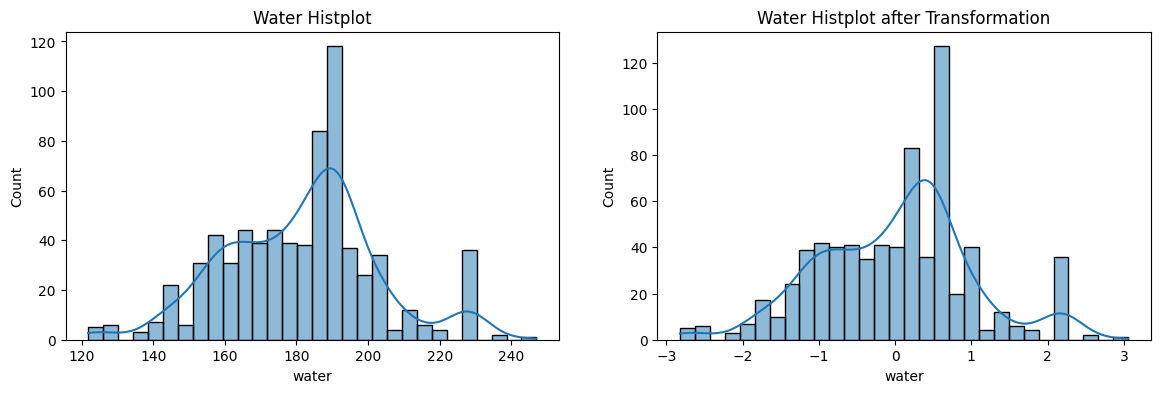

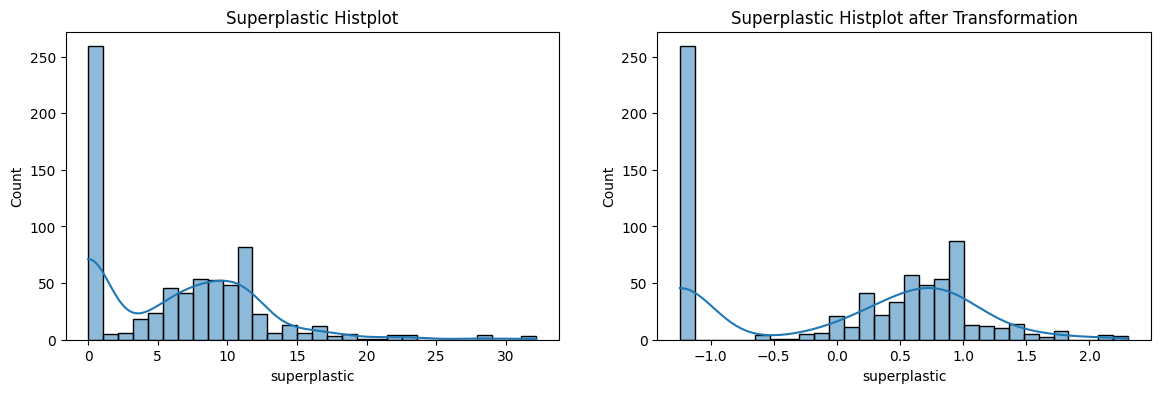

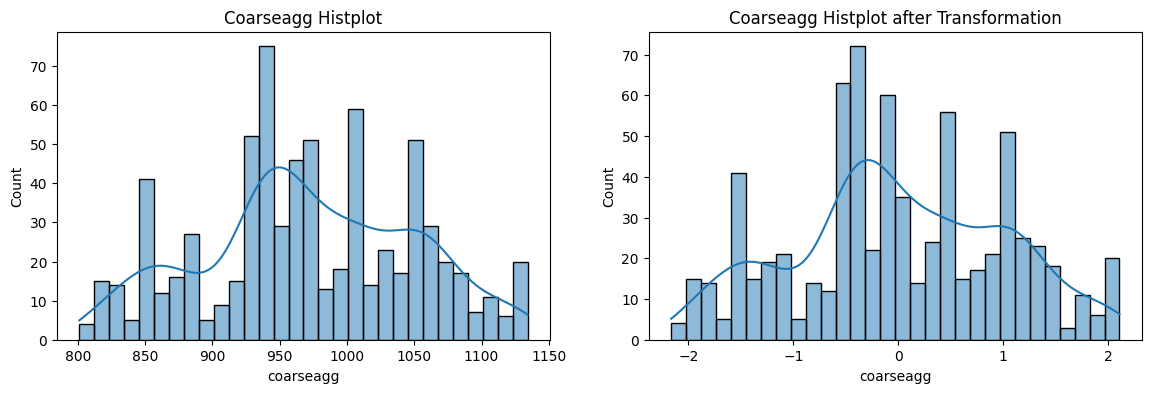

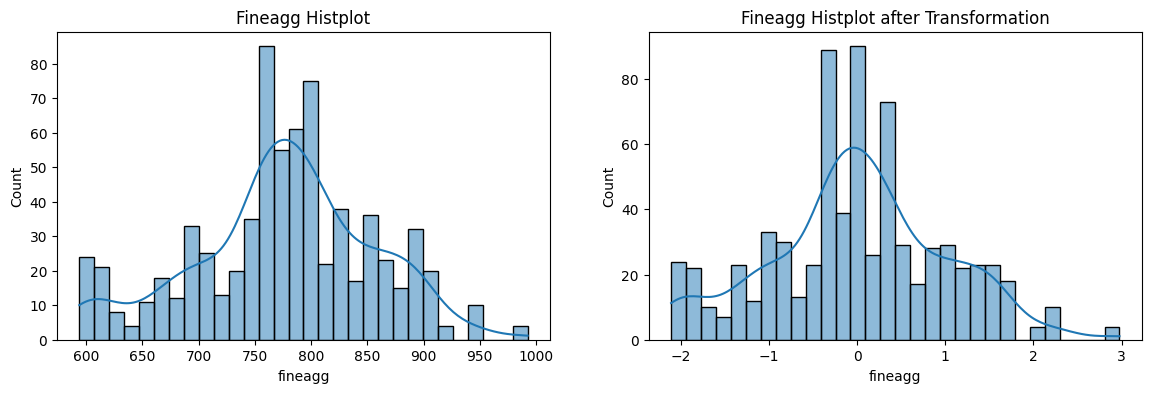

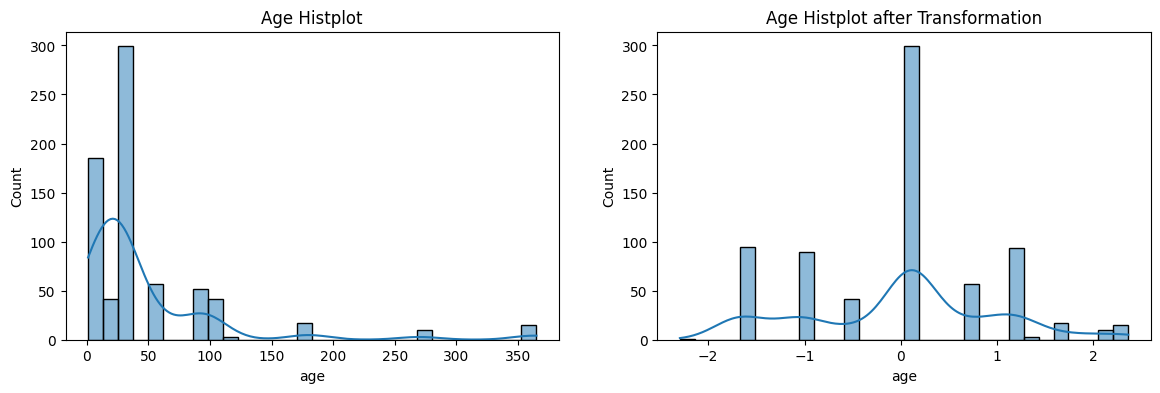

In [26]:
for column in x_train_transformed.columns:
    plt.figure(figsize=(14, 4))
    
    plt.subplot(121)
    sns.histplot(x_train[column], kde=True, bins=30)
    plt.title(column.title() + " Histplot")
    
    plt.subplot(122)
    sns.histplot(x_train_transformed[column], kde=True, bins=30)
    plt.title(column.title() + " Histplot after Transformation")
    
    plt.show()

## **Compare the λ Values between Box-Cox and Yeo-Johnson Transformation** 

In [27]:
# Convert the lambda values into a dataframe
lambda_values = pd.concat((lambda_values_box_cox, lambda_values_yeo_johnson), axis=1)
lambda_values.columns = ["Box_Cox_Lambdas", "Yeo_Johnson_Lambdas"]

In [28]:
lambda_values

,Box_Cox_Lambdas,Yeo_Johnson_Lambdas
cement,0.183828,0.181196
slag,0.023538,0.028011
ash,-0.032326,-0.165526
water,0.925279,0.924736
superplastic,0.084224,0.286946
coarseagg,1.144747,1.145007
fineagg,1.771619,1.772672
age,0.041458,-0.005485
